$~$

# IT Academy - Data Science Itinerary

$~$



## S05 T01: Sampling Methods with pyhton
__________


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import kaggle
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors
import squarify
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import random
pd.options.mode.chained_assignment = None  #to avoid SettingWithCopyWarning

$~$

####  Simple random sample

$~$

Choose a sports-themed dataset you like. Perform a sampling of the data generating a simple random sample and a systematic sample.
$~$
___

$~$
##### finding a dataset

$~$

Let's find a dataset in Kaggle. Using de following line, we can search for "sports" datasets

$~$

In [2]:
!kaggle datasets list -s "sports"

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpiosenka/sports-classification                            100 Sports Image Classification                 477MB  2022-01-13 16:08:31           1230         40  0.8235294        
the-guardian/olympic-games                                 Olympic Sports and Medals, 1896-2014            483KB  2017-01-24 15:05:37          23095        208  0.7058824        
ekrembayar/fifa-21-complete-player-dataset                 FIFA 21 COMPLETE PLAYER DATASET                   3MB  2020-10-05 06:21:30           2453         61  0.8235294        
parulpandey/forbes-highest-paid-athletes-19902019          Forbes Highest Paid Athletes 1990-2020        

$~$

for this exercice we are going to use [Olympic Sports and Medals, 1896-2014](https://www.kaggle.com/the-guardian/olympic-games?select=summer.csv) from Kaggle.
$~$ 

"the-guardian/olympic-games"
$~$ 
_____

$~$ 

##### downloading a dataset from kaggle

$~$ 

_____

$~$ 

We use the following code to download the dataset from kagggle:

$~$ 

In [3]:
PATH = "./data"

if not os.path.exists(PATH):
    os.makedirs(PATH)
if not os.listdir(PATH):
        !kaggle datasets download -d "the-guardian/olympic-games" --unzip -p $PATH  

100%|████████████████████████████████████████| 483k/483k [00:00<00:00, 3.45MB/s]
100%|████████████████████████████████████████| 483k/483k [00:00<00:00, 3.43MB/s]


In [4]:
files = [os.path.join(PATH,f) for f in os.listdir(PATH)]

for f in files:
    print(f)

./data/winter.csv
./data/summer.csv
./data/dictionary.csv



$~$ 

as we have downloaded three files, let's work with the file: "summer.csv"


$~$
___


$~$

##### reading the file


$~$

In [5]:
df = pd.read_csv(files[1])

$~$
____
##### getting information from the dataset


$~$



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
df.describe(include=[object])  

,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165,31165,31165,31165,31161,31165,31165,31165
unique,22,43,67,22762,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3638,22,4585,22746,1497,10486


In [8]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver



$~$
____

##### working on the dataset


$~$

we are going to analyze how many medals each country has, for them let's execute the following code:


$~$

In [9]:
medal_count = df.groupby("Country")["Medal"].agg(["count"]).sort_values(by="count", ascending=False)

In [10]:
medal_count["proportion"]= medal_count["count"] / medal_count["count"].sum()

In [11]:
medal_count.head(20)

,count,proportion
Country,,
USA,4585,0.147139
URS,2049,0.065755
GBR,1720,0.055197
FRA,1396,0.044800
GER,1305,0.041879
ITA,1296,0.041590
AUS,1189,0.038157
HUN,1079,0.034627
SWE,1044,0.033503



$~$

As we can see, the country that has the most medals in total is USA.


$~$

##### ploting the distribution

____
$~$

let's see graphically how is the distribution of total medals by country 


$~$

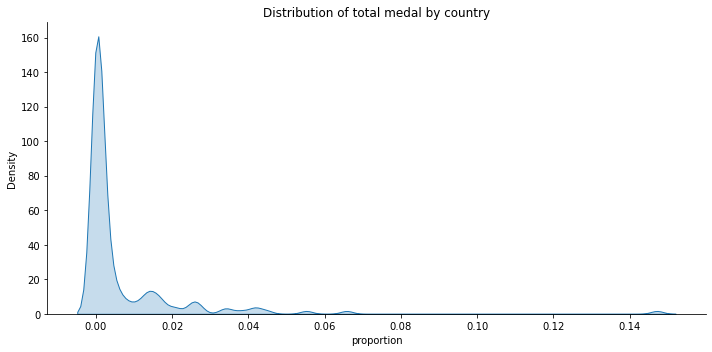

In [12]:
plt.figure(figsize = (10,5))
fig = sns.kdeplot(medal_count["proportion"],bw_method=.10, shade=True)

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_title("Distribution of total medal by country")

plt.tight_layout()

plt.show()

$~$

##### a simple sample
___

Once we have seen how the proportion of medals in our dataset is, let's proceed to obtain a simple random sample by executing the following code:

$~$

In [13]:
df_sample = df.sample(n=1000,random_state=2021)

$~$

now, we are going to transform the sample to be able to make comparisons with our original data

$~$

In [14]:
medal_count_sample = df_sample.groupby("Country")["Medal"]\
                    .agg(["count"]).sort_values(by="count", ascending=False)

In [15]:
medal_count_sample.head()

,count
Country,
USA,135
URS,75
GBR,57
ITA,56
FRA,52


In [16]:
medal_count_sample["proportion"]= medal_count_sample["count"]\
                                / medal_count_sample["count"].sum()

In [17]:
medal_count_sample.head()

,count,proportion
Country,,
USA,135,0.135
URS,75,0.075
GBR,57,0.057
ITA,56,0.056
FRA,52,0.052


In [18]:
medal_count.merge(medal_count_sample, left_on='Country', right_on='Country', 
                  suffixes=('_total', '_sample')).head(20)


,count_total,proportion_total,count_sample,proportion_sample
Country,,,,
USA,4585,0.147139,135,0.135
URS,2049,0.065755,75,0.075
GBR,1720,0.055197,57,0.057
FRA,1396,0.044800,52,0.052
GER,1305,0.041879,41,0.041
ITA,1296,0.041590,56,0.056
AUS,1189,0.038157,38,0.038
HUN,1079,0.034627,38,0.038
SWE,1044,0.033503,30,0.030


$~$

##### total populations vs simple sample

$~$

As can be seen in the table above, the simple sample benefits the countries that have more medals, but disadvantages the countries with fewer medals. This can be a problem if we work with data with subgroups.

$~$

$~$

##### graphic point of view: total populations vs simple sample

$~$

A quick way to see what our sampling is like is to make some plots. Let's see some:

$~$

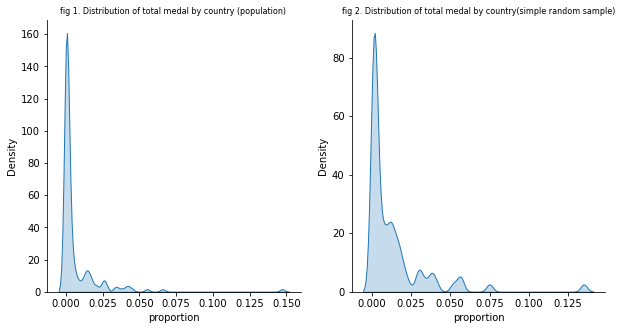

In [19]:
fig,axes = plt.subplots(1,2, figsize=(10,5))



sns.kdeplot(medal_count["proportion"],bw_method=.10, shade=True,ax=axes[0])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title("fig 1. Distribution of total medal by country (population) ",fontsize=8)


sns.kdeplot(medal_count_sample["proportion"],bw_method=.10, shade=True,ax=axes[1])
axes[1].set_title("fig 2. Distribution of total medal by country(simple random sample)",fontsize=8)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.show()


$~$

we can also see the effect of sampling in a Treemaps of the distribution

$~$



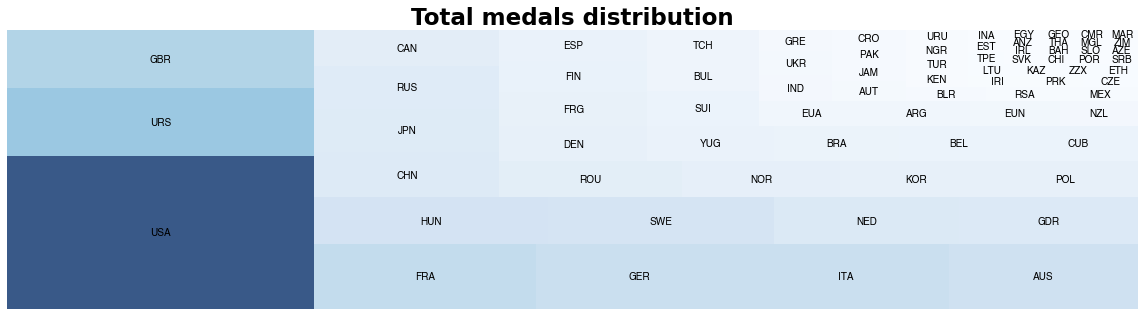

In [20]:
medal_count_plot = medal_count[medal_count["count"] > 20]

normdata = mpl.colors.Normalize(min(medal_count_plot["count"].values
), max(medal_count_plot["count"].values
))  
colormap = mpl.cm.Blues #this line allows us to change the colors
colors =colormap(normdata(medal_count_plot["count"].values
))


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(sizes=medal_count_plot["count"].values
, alpha=0.8, label=medal_count_plot.index,color = colors,
              text_kwargs={'fontsize':10, 'fontname':"helvetica",'weight':'bold'})
plt.title("Total medals distribution",fontsize=23,fontweight="bold")
plt.axis('off')
plt.tight_layout()

plt.show()



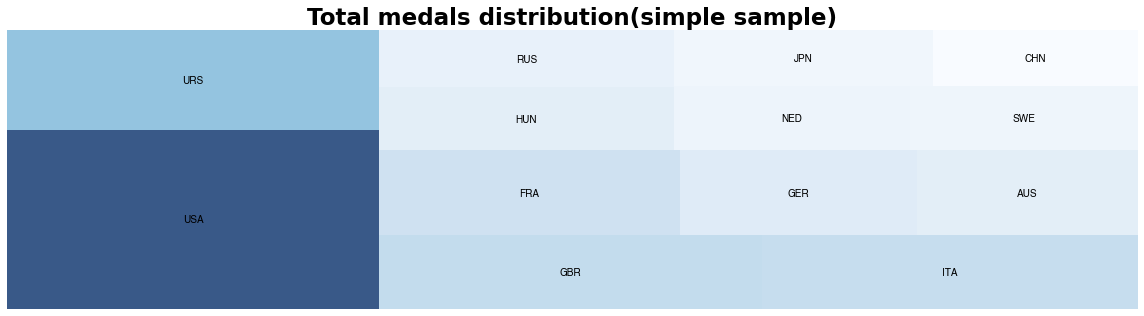

In [21]:
medal_count_sample_plot = medal_count_sample[medal_count_sample["count"] > 20]

normdata = mpl.colors.Normalize(min(medal_count_sample_plot["count"].values
), max(medal_count_sample_plot["count"].values
))  
colormap = mpl.cm.Blues #this line allows us to change the colors
colors =colormap(normdata(medal_count_sample_plot["count"].values
))


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

squarify.plot(sizes=medal_count_sample_plot["count"].values
, alpha=0.8, label=medal_count_sample_plot.index,color = colors,
              text_kwargs={'fontsize':10, 'fontname':"helvetica",'weight':'bold'})
plt.title("Total medals distribution(simple sample)",fontsize=23,fontweight="bold")
plt.axis('off')
plt.tight_layout()

plt.show()

___
$~$


####  Systematic Sample

$~$
___


The first thing we will do is define the interval:

$~$

In [22]:
sample_size= 1000

pop_size = len(df)

interval = pop_size // sample_size


$~$

let's randomly shuffle the rows and reset the index in case there is a built-in order that could bias the results.

$~$

In [23]:
shuffled= df.sample(frac=1,ignore_index=True)
shuffled.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
1,1924,Paris,Football,Football,"SOMMA, P.",URU,Men,Football,Gold
2,1988,Seoul,Handball,Handball,"TURCHINA, Zinaida",URS,Women,Handball,Bronze
3,2004,Athens,Handball,Handball,"BROEDSGAARD, Karen",DEN,Women,Handball,Gold
4,1996,Atlanta,Aquatics,Swimming,"HAN, Xue",CHN,Women,4X100M Medley Relay,Bronze


In [24]:
sys_sample = shuffled.iloc[::interval].reset_index(drop=True)


In [25]:
sys_sample.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
1,1928,Amsterdam,Football,Football,"BOSIO, Angel",ARG,Men,Football,Silver
2,2012,London,Aquatics,Water Polo,"SMITH, Sophie",AUS,Women,Water Polo,Bronze
3,1996,Atlanta,Handball,Handball,"MATYAS, Auguszta",HUN,Women,Handball,Bronze
4,1988,Seoul,Gymnastics,Artistic G.,"LIOUKINE, Valeri",URS,Men,Parallel Bars,Silver



##### working on the dataset


$~$

once we have the systematic sample, let's work a little with the data so we can make comparisons. 

$~$

In [26]:
medal_count_sys_sample = sys_sample.groupby("Country")["Medal"]\
                    .agg(["count"]).sort_values(by="count", ascending=False)

medal_count_sys_sample["proportion"]= medal_count_sys_sample["count"]\
                                / medal_count_sys_sample["count"].sum()

medal_count_sys_sample.head(20)

,count,proportion
Country,,
USA,150,0.149105
GBR,75,0.074553
URS,47,0.046720
AUS,47,0.046720
ITA,47,0.046720
GER,44,0.043738
HUN,36,0.035785
JPN,32,0.031809
SWE,32,0.031809



##### compare population vs systematic sample

_____
$~$

now we can compare our population with the systematic sample

$~$

In [27]:
medal_count.merge(medal_count_sys_sample, left_on='Country', right_on='Country', 
                  suffixes=('_total', '_sys_sample')).head(20)

,count_total,proportion_total,count_sys_sample,proportion_sys_sample
Country,,,,
USA,4585,0.147139,150,0.149105
URS,2049,0.065755,47,0.046720
GBR,1720,0.055197,75,0.074553
FRA,1396,0.044800,32,0.031809
GER,1305,0.041879,44,0.043738
ITA,1296,0.041590,47,0.046720
AUS,1189,0.038157,47,0.046720
HUN,1079,0.034627,36,0.035785
SWE,1044,0.033503,32,0.031809


$~$

we can also see the simple sample, the systematic sample together 

$~$

In [28]:
df1 = df["Country"].value_counts(normalize=True).to_frame('pop_proportion')
df2 = df_sample["Country"].value_counts(normalize=True).to_frame('simple_sample_proportion')
df3 = sys_sample ["Country"].value_counts(normalize=True).to_frame('sys_sample_proportion')

pd.concat([df1, df2, df3],axis=1).head(20)

,pop_proportion,simple_sample_proportion,sys_sample_proportion
USA,0.147139,0.135,0.149105
URS,0.065755,0.075,0.046720
GBR,0.055197,0.057,0.074553
FRA,0.044800,0.052,0.031809
GER,0.041879,0.041,0.043738
ITA,0.041590,0.056,0.046720
AUS,0.038157,0.038,0.046720
HUN,0.034627,0.038,0.035785
SWE,0.033503,0.030,0.031809
NED,0.027310,0.031,0.029821


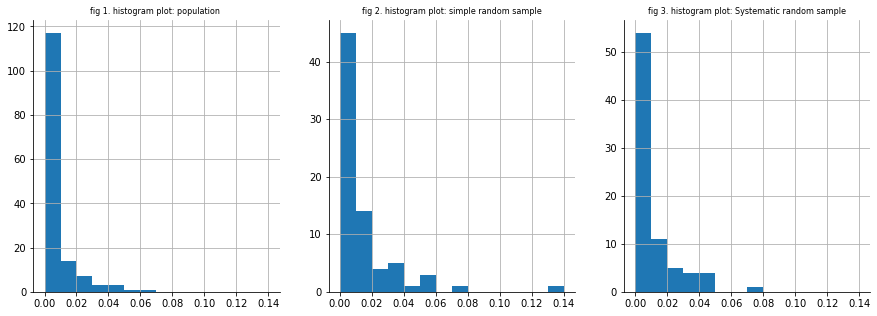

In [29]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

medal_count["proportion"].hist(bins=np.arange(0,0.15,0.01),ax=axes[0])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_title("fig 1. histogram plot: population ",fontsize=8)


medal_count_sample["proportion"].hist(bins=np.arange(0,0.15,0.01),ax=axes[1])
axes[1].set_title("fig 2. histogram plot: simple random sample",fontsize=8)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

medal_count_sys_sample["proportion"].hist(bins=np.arange(0,0.15,0.01),ax=axes[2])
axes[2].set_title("fig 3. histogram plot: Systematic random sample",fontsize=8)

axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.show()

$~$

####  stratified sample and SMOTE (Synthetic Minority Oversampling Technique).

$~$

Continue with the sports theme data set and generate a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique):
$~$
___
$~$

#####  stratified sample

$~$


$~$


To make it easier to think about sampling subgroups, let's limit our analysis to these ten countries. 



$~$

In [30]:
top_counts = df["Country"].value_counts()
top_counts.head(10)

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Country, dtype: int64

In [31]:
top_counts_countries = top_counts.head(10).index

top_counts_countries


Index(['USA', 'URS', 'GBR', 'FRA', 'GER', 'ITA', 'AUS', 'HUN', 'SWE', 'NED'], dtype='object')

$~$

We can use the dot-isin method to filter the population and only return the rows corresponding to these ten countries.

$~$

This filtered dataset is stored as countries_rating_top. 


$~$

In [32]:
top_counts_subset = df["Country"].isin(top_counts_countries)

countries_rating_top=df[top_counts_subset]

In [33]:
countries_rating_top.reset_index(drop=True)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
2,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
3,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze
4,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
16509,2012,London,Wrestling,Wrestling Freestyle,"EUREN, Johan",SWE,Men,Wg 120 KG,Bronze
16510,2012,London,Wrestling,Wrestling Freestyle,"MODOS, Peter",HUN,Men,Wg 55 KG,Bronze
16511,2012,London,Wrestling,Wrestling Freestyle,"LORINCZ, Tamas",HUN,Men,Wg 66 KG,Silver
16512,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze


$~$

Let's see how many medals each country has:


$~$

In [34]:
countries_rating_top["Country"].value_counts(normalize=True)

USA    0.277643
URS    0.124077
GBR    0.104154
FRA    0.084534
GER    0.079024
ITA    0.078479
AUS    0.072000
HUN    0.065339
SWE    0.063219
NED    0.051532
Name: Country, dtype: float64

$~$

Let's take a ten percent simple random sample of the dataset using dot-sample with frac set to zero-point-one. We also set the random_state argument to ensure reproducibility. 


$~$

In [35]:
country_rating_samp = countries_rating_top.groupby("Country")\
                                            .sample(frac=0.1,random_state=2021)


$~$

By grouping (by country) then sampling, the size of each group in the sample is representative of the size of the sample in the population.


$~$

In [36]:
country_rating_samp.reset_index(drop=True)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1996,Atlanta,Softball,Softball,"BROWN, Joanne",AUS,Women,Softball,Bronze
1,1988,Seoul,Cycling,Cycling Track,"MCCARNEY, Wayne",AUS,Men,Team Pursuit (4000M),Bronze
2,2000,Sydney,Aquatics,Swimming,"THORPE, Ian",AUS,Men,4X100M Freestyle Relay,Gold
3,1996,Atlanta,Aquatics,Swimming,"KOWALSKI, Daniel",AUS,Men,1500M Freestyle,Silver
4,1960,Rome,Boxing,Boxing,"TAYLOR, Oliver",AUS,Men,51 - 54KG (Bantamweight),Bronze
...,...,...,...,...,...,...,...,...,...
1646,1988,Seoul,Sailing,Sailing,"JEWELL, Lynne M.",USA,Women,470 - Two Person Dinghy,Gold
1647,1920,Antwerp,Aquatics,Swimming,"KAHANAMOKU, Duke Paoa",USA,Men,4X200M Freestyle Relay,Gold
1648,2004,Athens,Aquatics,Swimming,"KIRK, Tara",USA,Women,4X100M Medley Relay,Silver
1649,1988,Seoul,Aquatics,Swimming,"BIONDI, Matthew",USA,Men,4X100M Medley Relay,Gold


$~$

To make comparisons easier, as we do before, we set normalize to True to convert the counts into a proportion, which shows what proportion of medals in the sample came from each country. 

$~$

In [37]:
country_rating_samp["Country"].value_counts(normalize=True)

USA    0.277408
URS    0.124167
GBR    0.104179
FRA    0.084797
GER    0.078740
ITA    0.078740
AUS    0.072078
HUN    0.065415
SWE    0.062992
NED    0.051484
Name: Country, dtype: float64

$~$

now we can compare our population with the stratified sample

$~$

In [38]:
df1 = countries_rating_top["Country"].value_counts(normalize=True).to_frame('pop_proportion')
df2 = country_rating_samp["Country"].value_counts(normalize=True).to_frame('stat_proportion')

pd.concat([df1, df2],axis=1)

,pop_proportion,stat_proportion
USA,0.277643,0.277408
URS,0.124077,0.124167
GBR,0.104154,0.104179
FRA,0.084534,0.084797
GER,0.079024,0.078740
ITA,0.078479,0.078740
AUS,0.072000,0.072078
HUN,0.065339,0.065415
SWE,0.063219,0.062992
NED,0.051532,0.051484


$~$

**we see that the sample proportion is more similar to the population proportion**

$~$

___
$~$

#####  second method of stratified sample

$~$

now we are going to use a second method to obtain stratified samples. Here we will use the library: "sklearn.model_selection.train_test_split"
which will allow us to do what we did before, but much faster.

$~$


In [39]:
Xtrain, Xtest = train_test_split(countries_rating_top, test_size=0.10, stratify=countries_rating_top['Country'])


In [40]:
stratified_df = pd.DataFrame(Xtest)
stratified_df.head()


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
16950,1984,Los Angeles,Athletics,Athletics,"CONLEY, Mike",USA,Men,Triple Jump,Silver
195,1900,Paris,Aquatics,Water polo,PESLOY,FRA,Men,Water Polo,Bronze
8599,1952,Helsinki,Gymnastics,Artistic G.,"KALINCHUK, Ekaterina",URS,Women,Team Competition,Gold
6435,1936,Berlin,Athletics,Athletics,"BECCALI, Luigi",ITA,Men,1500M,Bronze
3923,1920,Antwerp,Shooting,Shooting,"BRACKEN, Raymond",USA,Men,"50M Army Pistol, Team",Gold


In [41]:
stratified_df.shape

(1652, 9)

In [42]:
countries_rating_top.shape

(16514, 9)

In [43]:
stratified_df["Country"].value_counts(normalize=True)

USA    0.277845
URS    0.124092
GBR    0.104116
FRA    0.084746
ITA    0.078692
GER    0.078692
AUS    0.072034
HUN    0.065375
SWE    0.062954
NED    0.051453
Name: Country, dtype: float64


$~$

now we can compare the two methods with our population


$~$


In [44]:
df1 = countries_rating_top["Country"].value_counts(normalize=True).to_frame('pop_proportion')
df2 = country_rating_samp["Country"].value_counts(normalize=True).to_frame('stat_proportion')
df3 = stratified_df["Country"].value_counts(normalize=True).to_frame('train_stat_proportion')

pd.concat([df1, df2, df3],axis=1)

,pop_proportion,stat_proportion,train_stat_proportion
USA,0.277643,0.277408,0.277845
URS,0.124077,0.124167,0.124092
GBR,0.104154,0.104179,0.104116
FRA,0.084534,0.084797,0.084746
GER,0.079024,0.078740,0.078692
ITA,0.078479,0.078740,0.078692
AUS,0.072000,0.072078,0.072034
HUN,0.065339,0.065415,0.065375
SWE,0.063219,0.062992,0.062954
NED,0.051532,0.051484,0.051453


$~$

**We see that with the two methods we obtain very similar results.**


$~$

___
$~$

#####  SMOTE

$~$

+ The first thing we must do before applying the SMOTE method is to transform our variables.
+ we are going to transform the variable "Country" . Let's change the country name to a number. We will do the same with the variable "Medal"

$~$

$~$

###### label encode

$~$

for this, we will use the [label Encode function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

$~$

In [48]:
labelencoder1 = LabelEncoder()
countries_rating_top["Country_label"] = labelencoder1.fit_transform(countries_rating_top["Country"])

In [49]:
labelencoder2 = LabelEncoder()
countries_rating_top["medal_label"] = labelencoder2.fit_transform(countries_rating_top["Medal"])

In [50]:
countries_rating_top["Country_label"].value_counts(normalize=True)

9    0.277643
8    0.124077
2    0.104154
1    0.084534
3    0.079024
5    0.078479
0    0.072000
4    0.065339
7    0.063219
6    0.051532
Name: Country_label, dtype: float64

$~$

as you can see above, we have changed the names of countries by numbers in the column "Country_Label"

$~$


In [51]:
countries_rating_top["Country"].value_counts(normalize=True)

USA    0.277643
URS    0.124077
GBR    0.104154
FRA    0.084534
GER    0.079024
ITA    0.078479
AUS    0.072000
HUN    0.065339
SWE    0.063219
NED    0.051532
Name: Country, dtype: float64

$~$

Having done all of the above,  now we can do SMOTE sampling


$~$

In [52]:
smote = SMOTE(sampling_strategy="not minority", random_state=6858)

X,y = smote.fit_resample(countries_rating_top[["Country_label","medal_label"]],countries_rating_top["Country_label"])

In [53]:
y.value_counts(normalize=True)

4    0.108866
9    0.108866
3    0.108866
2    0.108866
1    0.108866
0    0.108866
7    0.108866
5    0.108866
8    0.108866
6    0.020206
Name: Country_label, dtype: float64

In [54]:
print(X.shape)
print(countries_rating_top.shape)

(42116, 2)
(16514, 11)


$~$

as a result we have that now the proportion of medals is balanced and we also have a larger dataset (check the X.shape)

$~$
___
to be able to make comparisons, we are going to put the country labels back
$~$

In [55]:
X["Country"] = labelencoder1.inverse_transform(X["Country_label"])

$~$

Next, let's see the results of the proportions of the different sampling methods

$~$

In [56]:
df1 = countries_rating_top["Country"].value_counts(normalize=True).to_frame('pop_proportion')
df2 = country_rating_samp["Country"].value_counts(normalize=True).to_frame('stat_proportion')
df3 = stratified_df["Country"].value_counts(normalize=True).to_frame('train_stat_proportion')
df4= X["Country"].value_counts(normalize=True).to_frame("smote_proportion")

pd.concat([df1, df2, df3,df4],axis=1)

,pop_proportion,stat_proportion,train_stat_proportion,smote_proportion
USA,0.277643,0.277408,0.277845,0.108866
URS,0.124077,0.124167,0.124092,0.108866
GBR,0.104154,0.104179,0.104116,0.108866
FRA,0.084534,0.084797,0.084746,0.108866
GER,0.079024,0.078740,0.078692,0.108866
ITA,0.078479,0.078740,0.078692,0.108866
AUS,0.072000,0.072078,0.072034,0.108866
HUN,0.065339,0.065415,0.065375,0.108866
SWE,0.063219,0.062992,0.062954,0.108866
NED,0.051532,0.051484,0.051453,0.020206


___
$~$

####   Reservoir sampling method

$~$
Continue with the sports theme dataset and generate a sample using the Reservoir sampling method.

$~$

+ here we will follow this [tutorial](https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c):

$~$
___

In [57]:

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(len(countries_rating_top))
k=384
reservoir = []

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element

In [58]:
reservoir_sample = countries_rating_top.iloc[reservoir]
reservoir_sample.head()


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Country_label,medal_label
1113,1904,St Louis,Wrestling,Wrestling Free.,"CURRY, Robert",USA,Men,- 47.6KG (Light-Flyweight),Gold,9,1
10267,1960,Rome,Fencing,Fencing,"CURLETTO, Mario",ITA,Men,Foil Team,Silver,5,2
19807,1992,Barcelona,Aquatics,Water polo,"GANDOLFI, Ferdinando",ITA,Men,Water Polo,Gold,5,1
14143,1976,Montreal,Athletics,Athletics,"AKSENOVA, Lyudmila",URS,Women,4X400M Relay,Bronze,8,0
29377,2012,London,Aquatics,Swimming,"DORSOGNA, Tommaso",AUS,Men,4X100M Medley,Bronze,0,0


$~$

to see how good this method is, let's see the proportion of medals by country:

$~$

In [59]:
reservoir_sample["Country"].value_counts(normalize=True)

USA    0.257812
URS    0.106771
GBR    0.104167
GER    0.093750
FRA    0.091146
AUS    0.080729
SWE    0.080729
ITA    0.070312
NED    0.065104
HUN    0.049479
Name: Country, dtype: float64

$~$

to get a better perspective, let's look at 3  methods together:

$~$

In [60]:
df1 = countries_rating_top["Country"].value_counts(normalize=True).to_frame('pop_proportion')
df2 = country_rating_samp["Country"].value_counts(normalize=True).to_frame('stat_proportion')
df3 = stratified_df["Country"].value_counts(normalize=True).to_frame('train_stat_proportion')
df4= X["Country"].value_counts(normalize=True).to_frame("smote_proportion")
df5= reservoir_sample["Country"].value_counts(normalize=True).to_frame("reservoir_sample")
pd.concat([df1, df2, df3,df4,df5],axis=1)

,pop_proportion,stat_proportion,train_stat_proportion,smote_proportion,reservoir_sample
USA,0.277643,0.277408,0.277845,0.108866,0.257812
URS,0.124077,0.124167,0.124092,0.108866,0.106771
GBR,0.104154,0.104179,0.104116,0.108866,0.104167
FRA,0.084534,0.084797,0.084746,0.108866,0.091146
GER,0.079024,0.078740,0.078692,0.108866,0.093750
ITA,0.078479,0.078740,0.078692,0.108866,0.070312
AUS,0.072000,0.072078,0.072034,0.108866,0.080729
HUN,0.065339,0.065415,0.065375,0.108866,0.049479
SWE,0.063219,0.062992,0.062954,0.108866,0.080729
NED,0.051532,0.051484,0.051453,0.020206,0.065104


_____
$~$

###  conclusions

$~$

+ simple random sampling can be useful, but must be taken into account if the data is subgrouped.
+ both simple random sampling and random sampling how systematic sampling negatively affects subgroups with low proportions
+ Stratified sampling can be obtained by two different methods. In both cases the results obtained are similar.
+ to apply the SMOTE method it is necessary to transform the categorical variables to numeric ones. And this can be done using the label encoder
+ the reservoir sample method can be interesting, however, in the case of having data with subgroups, the samples obtained tend to be unbalanced

----------------
$~$

### *references*:

+ [
How to Download Kaggle Datasets using Jupyter Notebook
](https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/)
+ [Combining Pandas DataFrames: The easy way](https://towardsdatascience.com/combining-pandas-dataframes-the-easy-way-41eb0f2c1ebf)
+ [How to Display Two Pandas Dataframes side by side in Jupyter Notebook ](https://softhints.com/display-two-pandas-dataframes-side-by-side-jupyter-notebook/#solution3displaytwodataframebypandasmergewithoutindex)
+ [The 5 Sampling Algorithms every Data Scientist need to know](https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c)
+ [LabelEncoder](https://interactivechaos.com/es/python/function/labelencoder)
+ [Label Encoding in Python Explained](https://www.mygreatlearning.com/blog/label-encoding-in-python/#labelencodingusingpython)



-------------